In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

Рассмотрим Т15 34 прибор

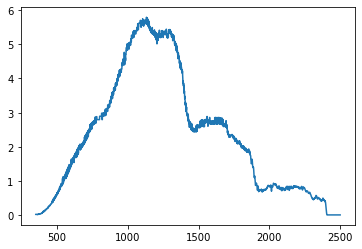

In [2]:
PATH = 'c:/work/Thomson Scattering/T-15/Spectral_cal/'

P = {'l': [], 'data': []}
with open(PATH + 'Lamp_p.txt', 'r') as file1:
    for line in file1:
        P['l'].append(float(line.split()[0]) * 1000)
        P['data'].append(float(line.split()[1]))

plt.plot(P['l'], P['data'])

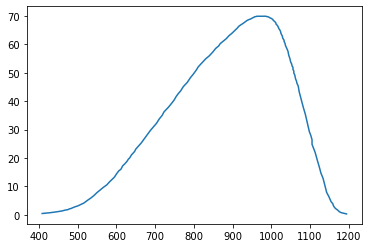

In [3]:
LFD = {'l': [], 'data': []}

with open(PATH + 'hamamatsu.txt', 'r') as file2:
    for line in file2:
        data = line.split()
        LFD['l'].append(float(data[0]))
        LFD['data'].append(float(data[1]))

plt.plot(LFD['l'], LFD['data'])

(900.0, 1100.0)

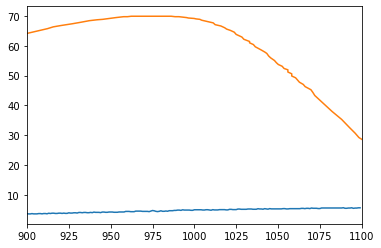

In [4]:
plt.plot(P['l'][550:750], P['data'][550:750])
plt.plot(LFD['l'][64:140], LFD['data'][64:140])
plt.xlim(900, 1100)

(900.0, 1100.0)

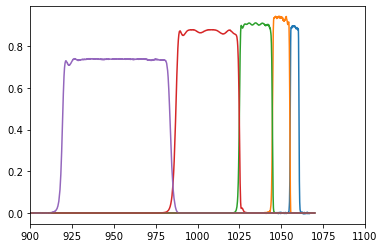

In [5]:
K = {'l': []}
for ch in range(1, 7):
    K[ch] = []
with open(PATH + 'optical_#34.txt') as file3:
    for line in file3:
        data = line.split()
        K['l'].append(float(data[0]))
        for ch in range(1, 7):
            K[ch].append(float(data[ch]))

for ch in range(1, 7):
    plt.plot(K['l'], K[ch])
plt.xlim(900, 1100)

In [6]:
def linear_approx(dict, l_new):
    data_new = []
    l_test = []
    for l in l_new:
        for i, l_old in enumerate(dict['l']):
            if dict['l'][i] <= l < dict['l'][i+1]:
                l_test.append(l)
                x1 = dict['l'][i]
                x2 = dict['l'][i+1]
                y1 = dict['data'][i]
                y2 = dict['data'][i+1]
                data_new.append(y1 + (y2 - y1) * (l - x1) / (x2 - x1))
    return data_new

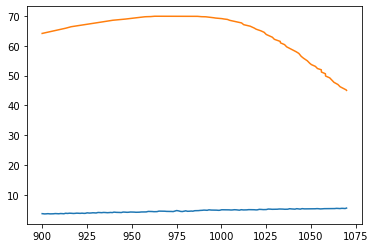

In [7]:
P_l = linear_approx(P, K['l'])
R_l = linear_approx(LFD, K['l'])

plt.plot(K['l'], P_l)
plt.plot(K['l'], R_l)

In [8]:
S = 1.55*1e-3*5.4*1e-3
Om = 0.16
Rsv = 10000
G_slow = 40

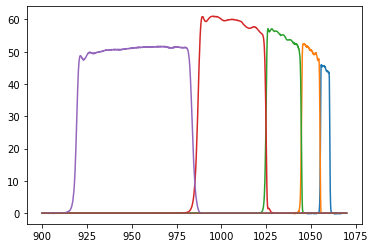

In [9]:
for ch in range(1, 7):
    plt.plot(K['l'], [K[ch][i] * R_l[i] for i in range(len(K['l']))])

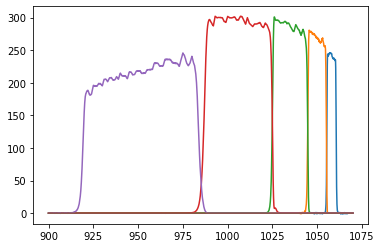

In [10]:
for ch in range(1, 7):
    plt.plot(K['l'], [K[ch][i] * R_l[i] * P_l[i] for i in range(len(K['l']))])


In [11]:
I = []
for ch in range(1, 7):
    I.append(np.trapz([K[ch][i] * R_l[i] * P_l[i] * 1000 * S * Om for i in range(len(K['l']))], [i * 1e-9 for i in K['l']]))
print(I)

[1.7142351530838356e-09, 3.765654808929586e-09, 7.58911988009873e-09, 1.507760320551806e-08, 1.885832220681888e-08, 0.0]


[141.3, 310.6, 625.1, 1169.5, 1828.6]
[117.4, 249.8, 512.8, 917, 1459]


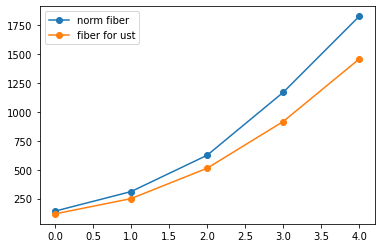

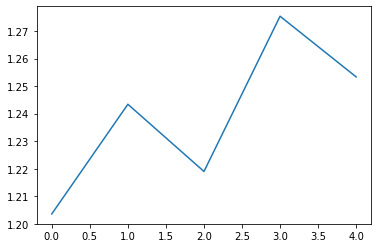

In [12]:
l_15 = [1058, 1050, 1035, 1008, 951]
U_nfiber = [141.3, 310.6, 625.1, 1169.5, 1828.6]
U_ust_fiber = [117.4, 249.8, 512.8, 917, 1459]
print(U_nfiber)
print(U_ust_fiber)
plt.plot(U_nfiber, 'o-', label='norm fiber')
plt.plot(U_ust_fiber, 'o-', label='fiber for ust')
plt.legend()
plt.figure()
plt.plot([U_nfiber[i]/ U_ust_fiber[i] for i in range(5)])

In [13]:
alpha = []

for ch in range(5):
    alpha.append(U_nfiber[ch] * 1e-3 / (Rsv * G_slow * 0.5 * I[ch]))

print(alpha)
'''for ch in range(1,5):
    alpha[ch] = alpha[ch] / alpha[0]
alpha[0] = alpha[0] / alpha[0]
plt.plot([i for i in range(1,6)], alpha, 'o--')'''

[412.1371555874565, 412.4116730820187, 411.8395873803668, 387.82689266288344, 484.8257389882771]


"for ch in range(1,5):\n    alpha[ch] = alpha[ch] / alpha[0]\nalpha[0] = alpha[0] / alpha[0]\nplt.plot([i for i in range(1,6)], alpha, 'o--')"

In [14]:
'''for ust fiber'''
alpha_ust = []

for ch in range(5):
    alpha_ust.append(U_ust_fiber[ch] * 1e-3 / (Rsv * G_slow * 0.5 * I[ch]))

print(alpha_ust)
'''for ch in range(1,5):
    alpha_ust[ch] = alpha_ust[ch] / alpha_ust[0]
alpha_ust[0] = alpha_ust[0] / alpha_ust[0]
plt.plot([i for i in range(1,6)], alpha_ust, 'o--')'''

[342.42676621349887, 331.68202168669757, 337.85208831971215, 304.09342502938364, 386.8318676495113]


"for ch in range(1,5):\n    alpha_ust[ch] = alpha_ust[ch] / alpha_ust[0]\nalpha_ust[0] = alpha_ust[0] / alpha_ust[0]\nplt.plot([i for i in range(1,6)], alpha_ust, 'o--')"

[19.64055795458484, 43.437353926986674, 89.00768841898486, 175.7208039880264, 320.17183245628735, 4.91013948864621, 10.859338481746668, 22.251922104746214, 43.9302009970066, 80.04295811407184]


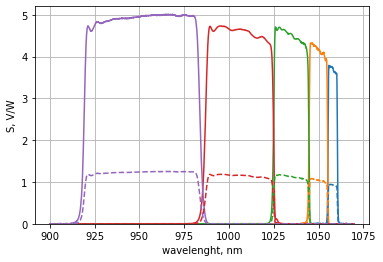

In [15]:
G_fast1 = 10
#G_fast2 = 2
U_res = []
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
'''for ch in range(1, 6):
    plt.plot(K['l'], [1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * P_l[i] * 1000 * S * Om * Rsv * G_slow * 0.5 for i in range(len(K['l']))])
    U_res.append(sum([1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * P_l[i] * 1000 * S * Om * Rsv * G_slow * 0.5 for i in range(len(K['l']))]) * (K['l'][1] - K['l'][0]))
'''
for ch in range(1, 6):
    plt.plot(K['l'], [1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * Rsv * G_slow * 0.5 for i in range(len(K['l']))])
    U_res.append(sum([1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * Rsv * G_slow * 0.5 for i in range(len(K['l']))]) * (K['l'][1] - K['l'][0]))
for ch in range(1, 6):
    plt.plot(K['l'], [1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * Rsv * G_fast1* 0.5 for i in range(len(K['l']))], '--', color=new_colors[ch-1])
    U_res.append(sum([1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * Rsv * G_fast1 * 0.5 for i in range(len(K['l']))]) * (K['l'][1] - K['l'][0]))
'''for ch in range(1, 6):
    plt.plot(K['l'], [1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * Rsv * G_fast2* 0.5 for i in range(len(K['l']))], '..')
    U_res.append(sum([1e-9 * K[ch][i] * R_l[i] * alpha[ch-1] * Rsv * G_fast2 * 0.5 for i in range(len(K['l']))]) * (K['l'][1] - K['l'][0]))'''

plt.ylabel('S, V/W')
plt.xlabel('wavelenght, nm')
plt.ylim(0, 5.2)
plt.grid()
plt.savefig('T15_norm.png', dpi=500)
print(U_res)

[16.318481980667098, 34.93448490328801, 73.01734541874167, 137.78193865499833, 255.4581119729427]


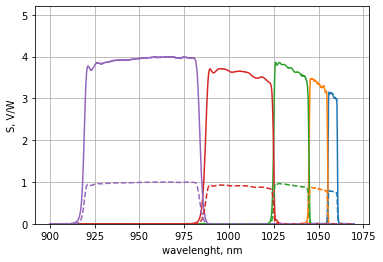

In [16]:
U_res = []
for ch in range(1, 6):
    plt.plot(K['l'], [1e-9 * K[ch][i] * R_l[i] * alpha_ust[ch-1] * Rsv * G_slow * 0.5 for i in range(len(K['l']))])
    U_res.append(sum([1e-9 * K[ch][i] * R_l[i] * alpha_ust[ch-1] * Rsv * G_slow * 0.5 for i in range(len(K['l']))]) * (K['l'][1] - K['l'][0]))
for ch in range(1, 6):
    plt.plot(K['l'], [1e-9 * K[ch][i] * R_l[i] * alpha_ust[ch-1] * Rsv * G_fast1 * 0.5 for i in range(len(K['l']))], '--', color=new_colors[ch-1])

plt.ylabel('S, V/W')
plt.xlabel('wavelenght, nm')
plt.ylim(0, 5.2)
plt.grid()
plt.savefig('T15_ust.png', dpi=500)
print(U_res)

In [17]:
al_dict = {}

K_new = {'l': K['l']}

for ch in range(1,6):
    K_new[ch] = [K[ch][i] * R_l[i] * alpha[ch-1] for i in range(len(K['l']))]

for ch in range(5):
    al_dict[ch+1] = alpha[ch]

with open(PATH + '22.04.13_sp_cal_coef.json', 'w') as file4:
    json.dump(al_dict, file4)

with open(PATH + '22.04.13_sp_cal.json', 'w') as file5:
    json.dump(K_new, file5)


In [18]:
al_dict_ust = {}

K_new_ust = {'l': K['l']}

for ch in range(1,6):
    K_new_ust[ch] = [K[ch][i] * R_l[i] * alpha_ust[ch-1] for i in range(len(K['l']))]

for ch in range(5):
    al_dict_ust[ch+1] = alpha_ust[ch]

with open(PATH + '22.04.13_sp_cal_coef_ust.json', 'w') as file4:
    json.dump(al_dict_ust, file4)

with open(PATH + '22.04.13_sp_cal_ust.json', 'w') as file5:
    json.dump(K_new_ust, file5)

For 11 device:



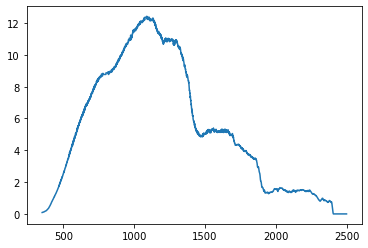

In [40]:
G_11 = [64, 64, 32, 16, 8, 4]
PATH11 = 'c:/work/Thomson Scattering/Filters_from_old_poly/11_poly/'
P_11 = {'l': [], 'data': []}
with open(PATH + 'Lamp_p_11_dev.txt', 'r') as file1:
    for line in file1:
        P_11['l'].append(float(line.split()[0]) * 1000)
        P_11['data'].append(float(line.split()[1]))

plt.plot(P_11['l'], P_11['data'])

(900.0, 1100.0)

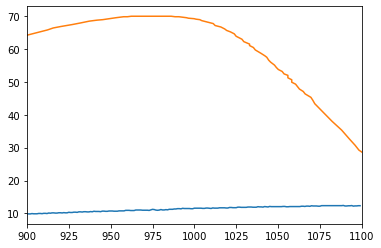

In [41]:
plt.plot(P_11['l'][550:750], P_11['data'][550:750])
plt.plot(LFD['l'][64:140], LFD['data'][64:140])
plt.xlim(900, 1100)

(800.0, 1100.0)

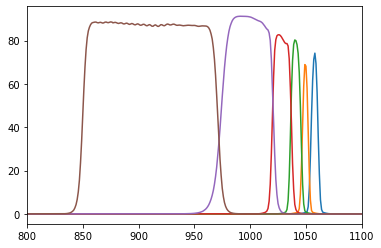

In [42]:
K_11 = {'l': []}
for ch in range(1, 7):
    K_11[ch] = []
with open(PATH11 + '11_dev.txt') as file3:
    for line in file3:
        data = line.split()
        K_11['l'].append(float(data[0]))
        for ch in range(1, 7):
            K_11[ch].append(float(data[ch]))

for ch in range(1, 7):
    plt.plot(K_11['l'], K_11[ch])
plt.xlim(800, 1100)

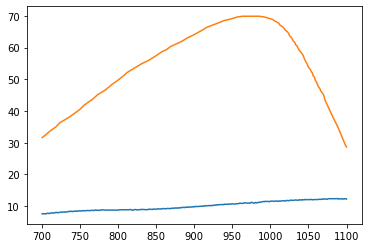

In [43]:
P_l_11 = linear_approx(P_11, K_11['l'])
R_l_11 = linear_approx(LFD, K_11['l'])

plt.plot(K_11['l'], P_l_11)
plt.plot(K_11['l'], R_l_11)

In [44]:
S = 1.55*1e-3*5.4*1e-3
Om = 0.16
Rsv = 10000
G_slow = 40

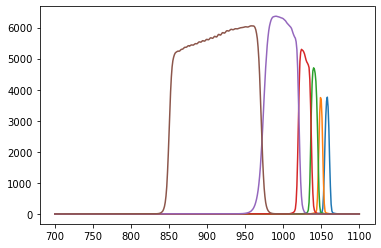

In [45]:
for ch in range(1, 7):
    plt.plot(K_11['l'], [K_11[ch][i] * R_l_11[i] for i in range(len(K_11['l']))])

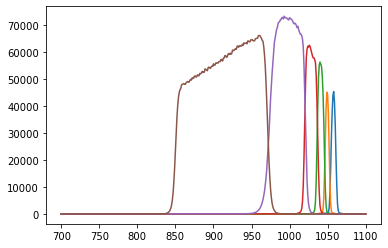

In [46]:
for ch in range(1, 7):
    plt.plot(K_11['l'], [K_11[ch][i] * R_l_11[i] * P_l_11[i] for i in range(len(K_11['l']))])

In [47]:
I11 = []
for ch in range(1, 7):
    I11.append(np.trapz([K_11[ch][i] * R_l_11[i] * P_l_11[i] * 1000 * S * Om for i in range(len(K_11['l']))], [i * 1e-9 for i in K_11['l']]))
print(I11)

[3.994547905888654e-07, 3.5238436891737654e-07, 7.00001906439187e-07, 1.4156945965199217e-06, 4.509010452384365e-06, 9.312484887822912e-06]


No handles with labels found to put in legend.


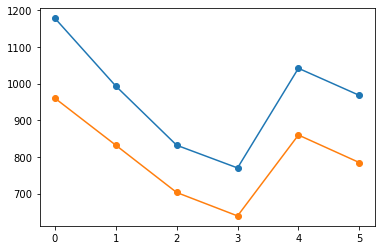

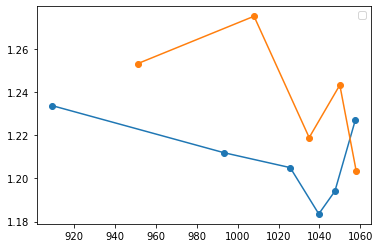

In [48]:
U_nfiber11 = [1178.6, 993.5, 831.9, 769.9, 1042, 968.1]
U_ust_fiber11 = [960.3, 832, 702.9, 638.9, 859.8, 784.6]
l_11 = [1057.65, 1047.6, 1039.7, 1025.7, 993.5, 909]
plt.plot(U_nfiber11, 'o-', label='norm fiber')
plt.plot(U_ust_fiber11, 'o-', label='fiber for ust')
plt.figure()
plt.plot(l_11, [U_nfiber11[i]/ U_ust_fiber11[i] for i in range(6)], 'o-')
plt.plot(l_15, [U_nfiber[i]/ U_ust_fiber[i] for i in range(5)], 'o-')

plt.legend()

In [49]:
alpha11 = []

for ch in range(6):
    alpha11.append(U_nfiber11[ch] * 1e-3 / (Rsv * G_11[ch] * 0.5 * I11[ch]))

print(alpha11)
'''for ch in range(1,6):
    alpha11[ch] = alpha11[ch] / alpha11[0]
alpha11[0] = alpha11[0] / alpha11[0]
plt.plot([i for i in range(1,7)], alpha11, 'o--')'''

[9.220380095005085, 8.810514239148773, 7.427658342315812, 6.7978997897267, 5.777320827949015, 5.197860783999211]


"for ch in range(1,6):\n    alpha11[ch] = alpha11[ch] / alpha11[0]\nalpha11[0] = alpha11[0] / alpha11[0]\nplt.plot([i for i in range(1,7)], alpha11, 'o--')"

In [50]:
'''for ust fiber'''
alpha_ust11 = []

for ch in range(6):
    alpha_ust11.append(U_ust_fiber11[ch] * 1e-3 / (Rsv * G_11[ch] * 0.5 * I11[ch]))

print(alpha_ust11)
'''for ch in range(1,6):
    alpha_ust11[ch] = alpha_ust11[ch] / alpha_ust11[0]
alpha_ust11[0] = alpha_ust11[0] / alpha_ust11[0]
plt.plot([i for i in range(1,7)], alpha_ust11, 'o--')'''

[7.512583578171886, 7.378306841441146, 6.275875764892156, 5.641223763678904, 4.7671213511233805, 4.212624285844211]


"for ch in range(1,6):\n    alpha_ust11[ch] = alpha_ust11[ch] / alpha_ust11[0]\nalpha_ust11[0] = alpha_ust11[0] / alpha_ust11[0]\nplt.plot([i for i in range(1,7)], alpha_ust11, 'o--')"

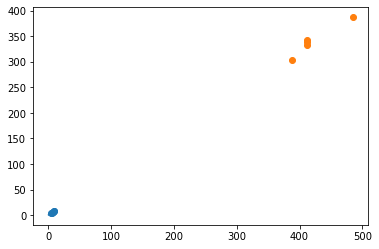

In [51]:
plt.scatter(alpha11, alpha_ust11)
plt.scatter(alpha, alpha_ust)
plt.plot([i/10 for i in range(5, 13)], [i/10 for i in range(5, 13)])

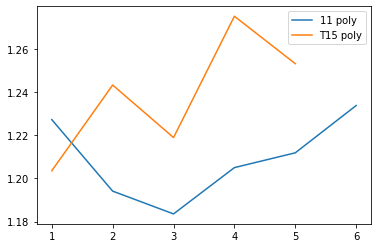

In [52]:
plt.plot([i+1 for i in range(len(alpha_ust11))],[alpha11[i] / alpha_ust11[i] for i in range(len(alpha_ust11))], label='11 poly')
plt.plot([i+1 for i in range(len(alpha_ust))],[alpha[i] / alpha_ust[i] for i in range(len(alpha_ust))], label ='T15 poly')
plt.legend()

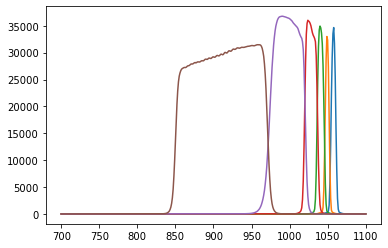

In [53]:
for ch in range(1, 7):
    plt.plot(K_11['l'], [K_11[ch][i] * R_l_11[i] * alpha11[ch-1] for i in range(len(K_11['l']))])


[72.85939397915315, 61.46147765824954, 51.76907882575806, 48.52244852000125, 68.1077249722735, 72.37580956070636]


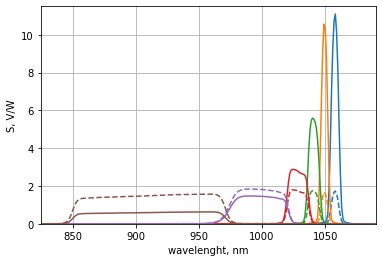

In [69]:
U_res = []
for ch in range(1, 7):
    plt.plot(K_11['l'], [1e-9 * K_11[ch][i] * R_l_11[i] * alpha11[ch-1] * Rsv * G_11[ch-1] * 0.5 for i in range(len(K_11['l']))])
    plt.plot(K_11['l'], [1e-9 * K_11[ch][i] * R_l_11[i] * alpha11[ch-1] * Rsv * G_fast1 * 0.5 for i in range(len(K_11['l']))], '--', color=new_colors[ch-1])
    U_res.append(sum([1e-9 * K_11[ch][i] * R_l_11[i] * alpha11[ch-1] * Rsv * G_11[ch-1] * 0.5 for i in range(len(K_11['l']))]) * (K_11['l'][1] - K_11['l'][0]))
plt.ylabel('S, V/W')
plt.xlabel('wavelenght, nm')
plt.ylim(0, 11.5)
plt.xlim(825, 1090)
plt.grid()
plt.savefig('11_norm.png', dpi=500)
print(U_res)

[59.36439507736362, 51.47050771179026, 43.74141784664665, 40.26625842242992, 56.198677477121635, 58.65722568053937]


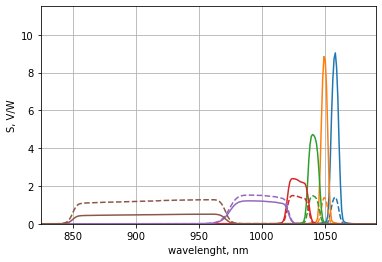

In [70]:
U_res = []
for ch in range(1, 7):
    plt.plot(K_11['l'], [1e-9 * K_11[ch][i] * R_l_11[i] * alpha_ust11[ch-1] * Rsv * G_11[ch-1] * 0.5 for i in range(len(K_11['l']))])
    plt.plot(K_11['l'], [1e-9 * K_11[ch][i] * R_l_11[i] * alpha_ust11[ch-1] * Rsv * G_fast1 * 0.5 for i in range(len(K_11['l']))], '--', color=new_colors[ch-1])
    U_res.append(sum([1e-9 * K_11[ch][i] * R_l_11[i] * alpha_ust11[ch-1] * Rsv * G_11[ch-1] * 0.5 for i in range(len(K_11['l']))]) * (K_11['l'][1] - K_11['l'][0]))
plt.ylabel('S, V/W')
plt.xlabel('wavelenght, nm')
plt.ylim(0, 11.5)
plt.xlim(825, 1090)
plt.grid()
plt.savefig('11_ust.png', dpi=500)
print(U_res)